In [1]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns; sns.set_style("ticks")
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#the original dataset we are using
df = pd.read_csv("train.csv", delimiter=",")

#Area
#Looking at other features and trends. Ex: Screen size/Phone dimension vs Bluetooth, Wifi, Performance, etc.s
#QUESTION: Which features of a phone have the most impact on the price_range of a phone?
#QUESTION2: Are other features correlated to each other, outside of price range?

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


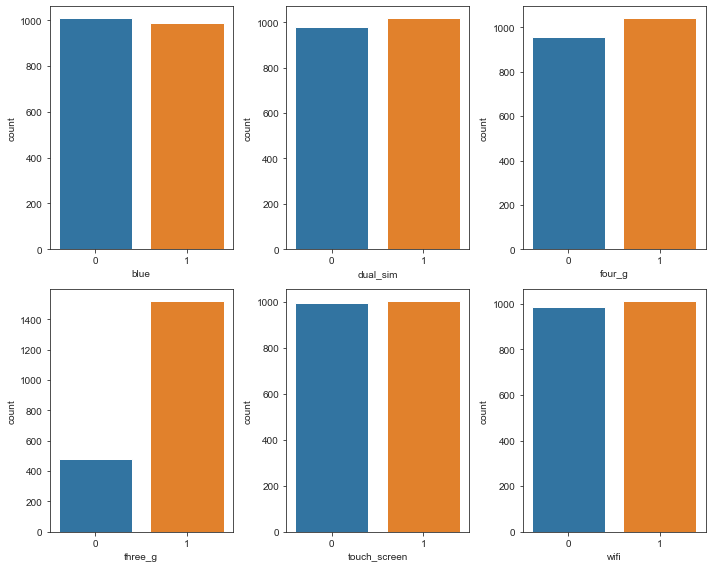

In [2]:
#all binary variables visualized

plt.figure(figsize=(10,8))
col = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
c = 1
for i in col:
    if c < 7:
        plt.subplot(2,3,c)
        sns.countplot(x = i,data =df)
        plt.xlabel(i)
    c += 1
    plt.tight_layout()

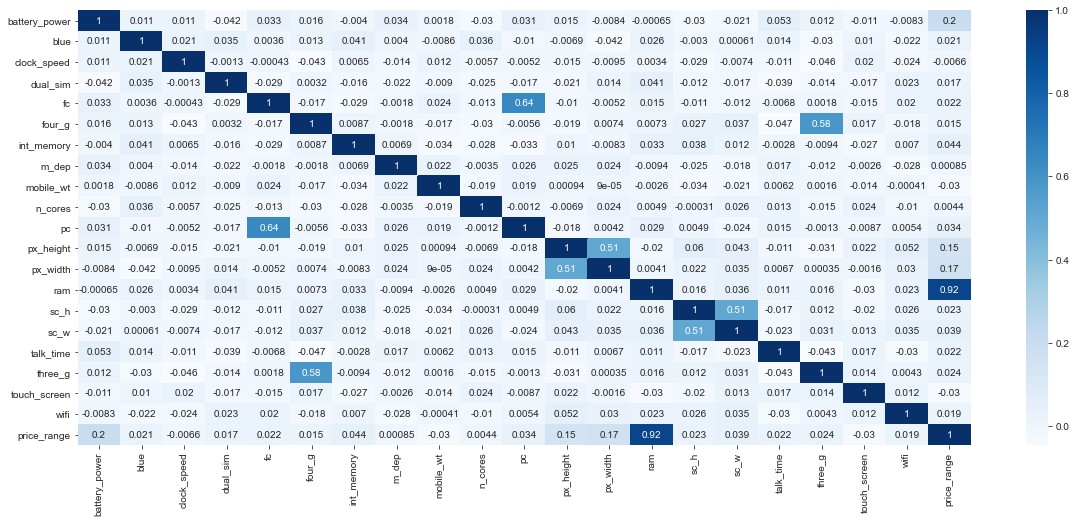

In [3]:
#Correlation matrix heatmap to look at all variable correlation

plt.figure(figsize=(20, 8)) #making this graph bigger otherwise it's too small to read

correlation_rate = df.corr()

sns.heatmap(correlation_rate, annot = True, cmap = "Blues")

#High Correlation (>0.8):
#price_range and ram (0.92)

#Moderate Correlation (>0.5):
#three_g and four_g (0.58)
#pc and fc (0.64)
#px_height and px_width (0.51)
#sc_h and sc_w (0.51)

#Some Correlation (>0.1):
#battery_power and price_range (0.2)
#px_height and price_range (0.15)
#px_width and price_range (0.17)

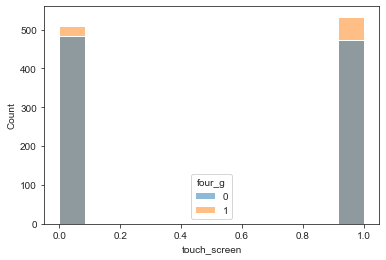

In [4]:
#4G phones with touchscreen 

sns.histplot(data=df, x="touch_screen",hue="four_g")
#4G is rare in both non touchscreen phones and touchscreen phones
#more 4G enabled phones that have a touch screen than non touch screen phones

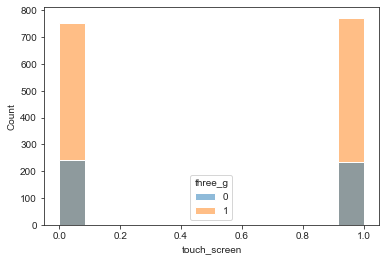

In [5]:
#3G phones with touchscreen

sns.histplot(data=df, x="touch_screen",hue="three_g")
#3G is evenly distributed in both non touchscreen phones and touchscreen phones

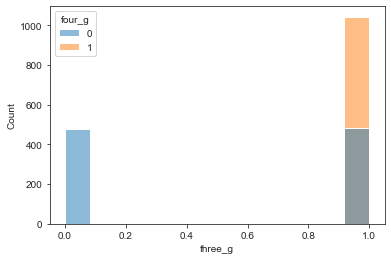

In [6]:
#four_g and three_g relationship

sns.histplot(data=df, x="three_g",hue="four_g")
#no 3G = no 4G
#yes 3G = approximately 50% of the phones also have 4G

In [7]:
#checking relationship between pc and fc
sns.boxplot(data=df, x="pc",y="fc")
#Trend: Higher pc = higher fc, positive relationship

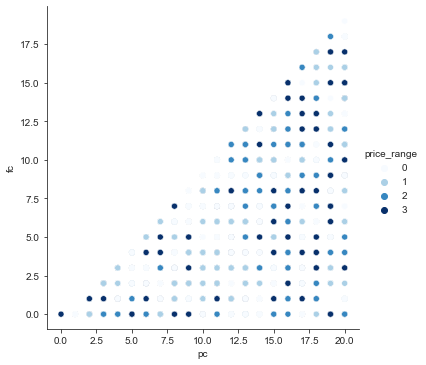

In [ ]:
#looking at pc and fc relationship with price_range
sns.relplot(data=df, x="pc",y="fc",hue="price_range",palette="Blues")
#does not seem like price_range is impacted by pc/fc

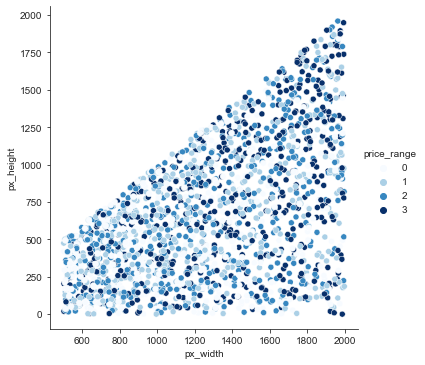

In [ ]:
#looking at px_width and px_height relationship with price_range 

sns.relplot(data=df, x="px_width",y="px_height",hue="price_range",palette="Blues")
#bigger phone dimension does seem to have higher price_range overall
#general trend seems that high px_width = high px_height at the ceiling

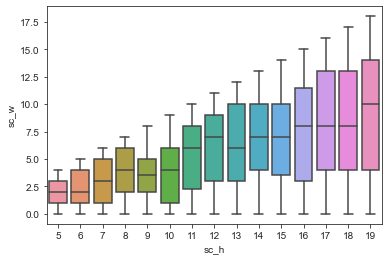

In [ ]:
#looking at sc_w and sc_h relationship with price_range
#sns.relplot(data=df, x="sc_w",y="sc_h",hue="price_range",palette="Blues")
sns.boxplot(data=df, x="sc_h",y="sc_w")
#does not seem like price_range is impacted by sc_h / sc_w
#sc_w and sc_h does seem to have positive relationship in general

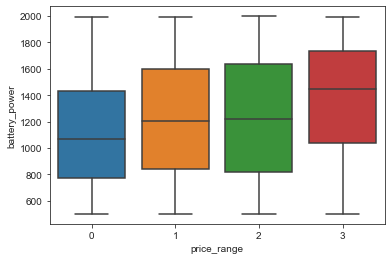

In [ ]:
sns.boxplot(data=df,x="price_range",y="battery_power")

#very similar to each other but highest price_range does have higher battery_power numbers on average, and lowest price_range has lowest battery_power numbers on average

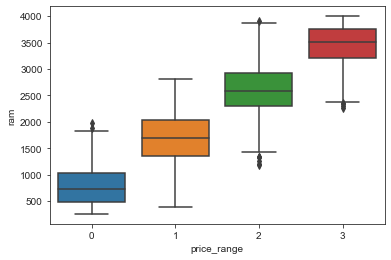

In [ ]:
sns.boxplot(data=df,x="price_range",y="ram")

In [ ]:
#apply selectkbest class to select top ten k best feature
x=df.iloc[:,0:20] #this will select columns up to "wifi" so price_range is not included
y=df.iloc[:,-1] #price_range
bestfeature= SelectKBest(score_func=chi2,k=10)
fit=(bestfeature.fit(x,y))

dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']

featureScores #feature scores for each column up to wifi; excluding price_range

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [ ]:
#using SelectKBest that will select top 10 features
print(featureScores.nlargest(10,'Score'))
#we can see ram has the highest impact on price, followed by px_height, battery_power, and px_width
#rest of the features are very small in terms of scores

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

Basic Graphs

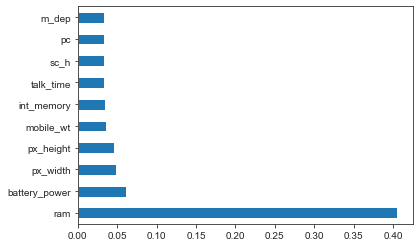

In [ ]:
#feature importance graph
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
#again, for price_range impact, ram is the highest, followed by battery_power, px_width, and px_height

Conclusion1: Ram has the highest impact on price_range of a phone
battery_power and dimension of a phone (pixels) has a slight impact on the price_range of a phone based on correlation heatmap
Other features are not as important for impacting the price_range

Conclusion2: pixel dimensions of a phone are correlated with each other (height and weight)
So are fc & pc, three_g & four_g, px_width & px_height, sc_h & sc_w. All have a generally positive relationship to each other
px_width & px_height have a loosely positive relationship with price_range but not other features, supporting conclusion1